#### Importing Dependancies:

In [50]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


#### Checking Data:

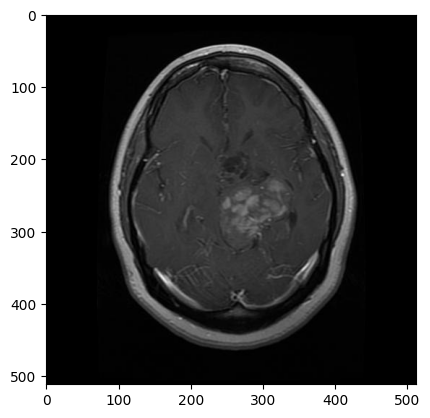

In [66]:
img = os.path.join('Data/Training/glioma_tumor/gg (1).jpg')
img = cv2.imread(img)
plt.imshow(img)
plt.show()

#### Merging Data:

In [3]:
train_base_dir = 'Data/Training'
test_base_dir = 'Data/Testing'

In [4]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for label in labels:
    folder = os.path.join(train_base_dir, label)
    for img_names in os.listdir(folder):
        image = cv2.imread(os.path.join(folder, img_names))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        y_train.append(label)
        
for label in labels:
    folder = os.path.join(test_base_dir, label)
    for img_names in os.listdir(folder):
        image = cv2.imread(os.path.join(folder, img_names))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

##### Shuffle Data:

In [5]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train.shape

(3264, 150, 150, 3)

#### Spliting Data:

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
X_train[0].shape

(150, 150, 3)

#### Model Building:

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [21]:
hist = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 382s 5s/step - loss: 2.1595 - accuracy: 0.3148 - val_loss: 1.2843 - val_accuracy: 0.4932
Epoch 2/30
83/83 [==============================] - 306s 4s/step - loss: 1.1276 - accuracy: 0.5161 - val_loss: 0.9146 - val_accuracy: 0.6361
Epoch 3/30
83/83 [==============================] - 304s 4s/step - loss: 0.9195 - accuracy: 0.6065 - val_loss: 0.8863 - val_accuracy: 0.6395
Epoch 4/30
83/83 [==============================] - 309s 4s/step - loss: 0.8310 - accuracy: 0.6583 - val_loss: 0.7321 - val_accuracy: 0.7007
Epoch 5/30
83/83 [==============================] - 305s 4s/step - loss: 0.7174 - accuracy: 0.7128 - val_loss: 0.6324 - val_accuracy: 0.7381
Epoch 6/30
83/83 [==============================] - 308s 4s/step - loss: 0.5831 - accuracy: 0.7635 - val_loss: 0.5269 - val_accuracy: 0.7687
Epoch 7/30
83/83 [==============================] - 304s 4s/step - loss: 0.4758 - accuracy: 0.8146 - val_loss: 0.4827 - val_accuracy: 0.8095
Epoch 8/30
83

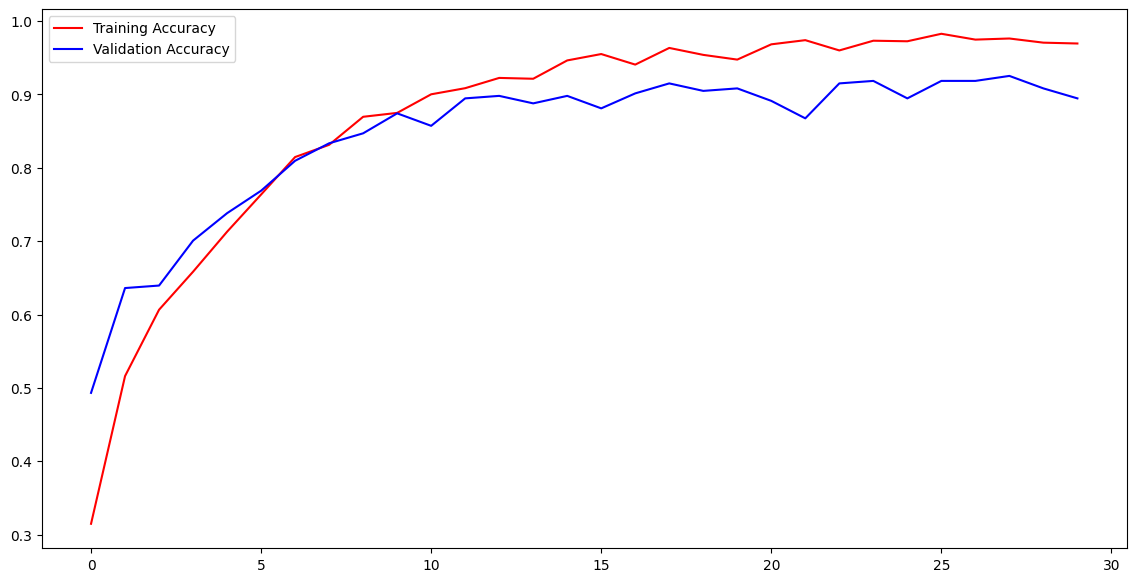

In [25]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

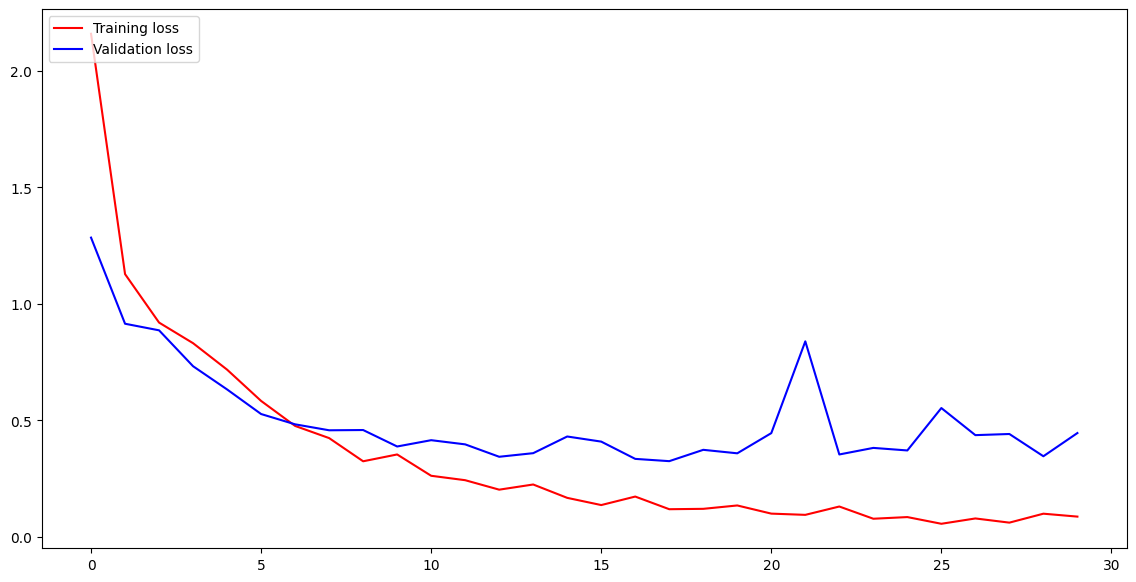

In [26]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

#### Prediction:

In [38]:
img = cv2.imread('Data/Training/meningioma_tumor/m (43).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [39]:
img_array = np.expand_dims(img_array,axis=0)
img_array.shape

(1, 150, 150, 3)

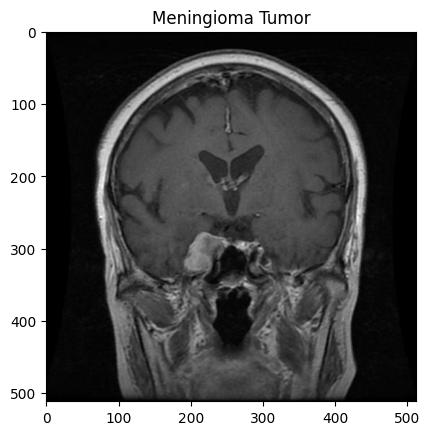

In [65]:
from tensorflow.keras.preprocessing import image
img = image.load_img('Data/Training/meningioma_tumor/m (43).jpg')
plt.title('Meningioma Tumor')
plt.imshow(img)
plt.show()

In [46]:
result = model.predict(img_array)
result = result.argmax()
print(result)
result = labels[result]
print(result)

1/1 [==============================] - 0s 132ms/step
1
meningioma_tumor


In [48]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

11/11 [==============================] - 9s 805ms/step
[[95  2  2  1]
 [16 71  2  3]
 [ 3  1 44  1]
 [ 1  1  0 84]]


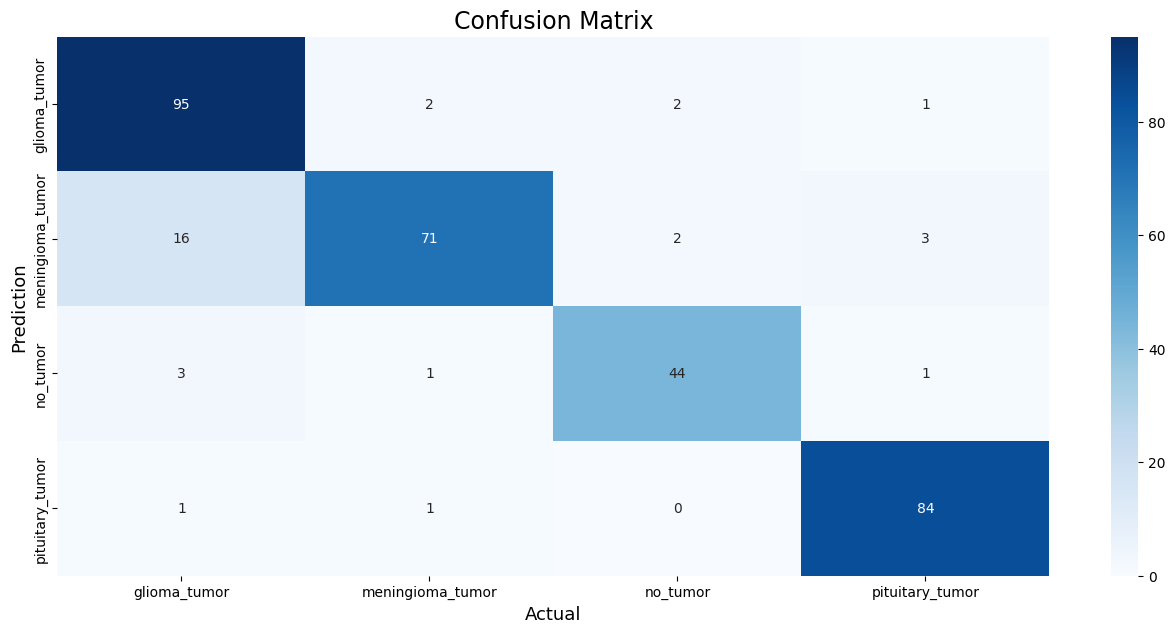

In [68]:
plt.figure(figsize=(16,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'],
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
print('Precision: ',precision)
recall = recall_score(y_test, y_pred,average='weighted')
print('Recall: ',recall)
f1 = f1_score(y_test, y_pred,average='weighted')
print('F1 score: ',f1)

Accuracy:  0.8990825688073395
Precision:  0.9045481191988276
Recall:  0.8990825688073395
F1 score:  0.8978998354154684


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=labels))

                  precision    recall  f1-score   support

    glioma_tumor       0.83      0.95      0.88       100
meningioma_tumor       0.95      0.77      0.85        92
        no_tumor       0.92      0.90      0.91        49
 pituitary_tumor       0.94      0.98      0.96        86

        accuracy                           0.90       327
       macro avg       0.91      0.90      0.90       327
    weighted avg       0.90      0.90      0.90       327



#### Save model:

In [59]:
model.save('braintumor.h5')

In [60]:
from tensorflow.keras.models import load_model

In [61]:
new_model = load_model('braintumor.h5')

In [64]:
p = new_model.predict(img_array)
p = p.argmax()
print(labels[p])

1/1 [==============================] - 0s 59ms/step
meningioma_tumor
